Portfolio 3

1) Beskriv (med referencer) hvorfor institutionen har en API tilgang til deres datasæt,  hvad det er blevet brugt til og/eller hvad de tænker det kunne bruges til?


'SMK Open' strækker sig fra 2016 til 2020, og omhandler at stille museets samling til fri digital afbenyttelse (https://nordeafonden.dk/projekter/smk-digitaliserer-kunstsamlingen). 
        SMK beskriver selv at de i projektet arbejder med at "alle skal have mulighed for at bane deres helt egen vej ind i kunstens verden og trække informationer fra SMK’s store samling af viden og materiale"(https://www.smk.dk/article/smk-open/). De ønsker altså at digitalisere værkerne med henblik på at gøre dem tilgængelige for alle danskere, der via projektet får mulighed for bruge kunsten som "en ressource og et redskab", de kan bruge på deres egne vilkår.
        API tilgangen ligger i forlængelse af dette, og giver SMK mulighed for at udgive deres digitale samling på "en struktureret og offentligt tilgængelig måde som andre tjenester kan bruge direkte". Således kan man som app- eller hjemmeside-udvikler tilgå præcis de samme data, som SMK Open har brugt til deres projekt (https://www.smk.dk/article/smk-api/).

2) Sammensæt en URL der søger efter kulturinstitutionens elementer (fx. genstande, kunstværker, personer, avisartikler, osv.) i APIen (gerne 100+ stk) med output i JSON. Load denne URL i en JSON beautifier og beskriv indholdet:

Jeg har valgt at søge på "Matisse", mend henblik på at arbejde med SMK's samling af Matisse-værker.

Min søgning på SMK's 'Swagger' var under art/search, og mine søgeord: Matisse, Henri. Herudover har jeg i query field markeret "Creator".

Det resulterende URL https://collection.smk.dk/#q=henri%20matisse&fq=artist_surname_firstname%3A%22Matisse%20Henri%22 Har jeg sat ind i beautifieren på https://codebeautify.org/jsonviewer 

Heraf fremgår det, at der i SMK's database er 199 værker skabt af Matisse. Når jeg krydsreferer med søgning på https://collection.smk.dk og direkte i feltet "kunstner/producent" søger på Henri Matisse, får jeg 197 hits.  - hvilket i Out[25] viser sig at være for 'Henri Matisse' indgår i henholdsvis titlen og beskrivelsen på værker af to andre kunstnere

a) Hvilken typer metadata er der for hver element?

Når jeg kører mit URL i beautifieren får jeg 10 eksempler ud af de 199 resultater. Hver har mellem 24-41 kategorier af metadata. Herunder detaljeret information om anskaffelse og katalogisering af værkerne. Endvidere har alle værkerne opgørelse over teknikker/techniques (fx Kul på papir), produktionsdato/production_date, værkets størrelse (bl.a. dimensions), beskrivelse af motivet, 'colors', der har hex-farvekoderne for hvert værks faver og meget mere. Dvs Størstedelen er deskriptive data om det enkelte værk. Herudover er der informationer som "on_display", "public_domain", "has_image" der velsagtens beskriver hvorvidt værket er hjemme på museet.

b)Sammenlign metadata med Dublin Core. Er der overensstemmelse?

Ved første blik på de metadata, der i beautifieren fremgår af datasættet, er der ca 24-40 metadatapunkter for hvert værk.
Første punkt - 'Contributor' ser jeg ikke noget direkte synonym for. Men jeg beskæftiger mig også med værker af én mand, Matisse. Derfor kunne noget lignende 'contributor' findes i 'exhibitions' eller 'documentation', hvilket fortæller os hvor værket har været eksponeret på udstillinger og i litteratur.

'Coverage' kan man finde under 'production', hvor der står værket er fransk - eller under 'responsible_department', der informerer os om, hvor værket nu befinder sig.

'Creator' er et faktisk punkt, dog inddelt i en række metadata om skaberen.

'Date' er delt op i flere underkategorier som 'acquisition_date', 'production_date' etc.

'Description' er ligeledes fordelt på flere underkategorier som f.eks. 'object_names' og 'image_orientation'

'Format' kan findes under 'dimensions', 'techniques' og 'materials'

Dublin Core's punkt 'Identifier' kan oversættes direkte til SMK's 'id'

'Language' er dækket af et 'language'-punkt, der dog hos SMK kun dækker, om titlen på værket er angivet på fransk, engelsk eller dansk.

'Publisher' kan ligeledels betragtes som nogenlunde dækket af 'responsible_department'

'Relation' findes hos SMK som 'alternative_images' 

'Rights' - under 'rights' henviser SMK til https://en.wikipedia.org/wiki/Copyright, og har yderligere punktet 'puplic_domain', som beskriver om værket er offentlig ejendom (true/false)

'Source' er ikke en punkt i SMK's data. Dog er 'acquisition_date' dokumentation af, hvornår de har anskaffet sig de enkelte værker.

'Subject' - 'image_orientation' beskriver typen af billede - f.eks. 'portrait' eller 'landscape' 

'Title' - under 'titles' er titlerne nævnt, på de værker der ellers har navne

'Type' - 'image_orientation' og 'distinguishing_features'


c) Er der nogle tal der kan bruges til statistiske beregninger (fx. årstal)?

Ja! Med acquisition_date_precision og/eller production_date ville man f.eks. kunne beregne statistik på hvornår værkerne er skabt og/eller hvornår museet har fået fat i dem. - mest interessant ville måske være, at se på hvornår Matisse var mest produktiv.

d) Hvilke slags spørgsmål kunne besvares gennem analyse af dette datasæt? 

Ud over ovenstående eksempler, kunne man f.eks. lave statistik over farvebrug med hex-farvekoderne, og yderligere finde ud af om enkelte præcise farver er overrepræsenteret - havde Henri Matisse en yndlingsfarve?
'Techniques' giver mulighed for  at lave statistik på, hvilken teknik der er mest fremkommende hos Matisse i SMK-samlingen (techniques). 





3) i

In [1]:
# importer requests modulet
import requests
# importer pandas
import pandas as pd
# importer numpy
import numpy as np
# importer json normalize modulet
from pandas.io.json import json_normalize

In [2]:
# en variabel for mit API URL - (v1)
api_search_url = 'https://api.smk.dk/api/v1/art/search/'

params = {
    'keys': 'Matisse', 
    'rows': 200,
    'offset':0
}

response = requests.get(api_search_url, params=params)
print(response)

<Response [200]>


In [3]:
# retrieve the JSON from the response variable and add to the json variable
json = response.json()


For at undgå problemer med mine 'nested json', kører jeg flatten_json, for at "pakke" mine metadata ud som indviduelle kolonner.

I det ovenstående har jeg ændret på mine parametre, da resultatet var et "empty dataframe". Jeg fjernede parametret 'qfields', der var "creator", hvorefter det lykkedes - dog kun med en dataframe bestående af 7 rækker og 44 kolonner. Efterfølgende ændrede jeg mit søgeord til kun at være 'Matisse', og satte til 200 rows.
Når jeg søger på 'Matisse' på https://collection.smk.dk/#/en/q=Matisse får jeg kun 197 resultater, men når jeg beautifier min søgning fra 'Swagger', får jeg 268 resultater HVAD ER DET

In [4]:
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out



In [5]:
dic_flattened = [flatten_json(d) for d in json['items']]
df= json_normalize(dic_flattened)

In [6]:
# 3) ii og iii
df.shape
# Som vi kan se, er der nu 816 kolonner at gøre godt med. En masse af det her forekommende data er jeg ikke interesseret i, så jeg rydder op i mine kolonner.

(200, 816)

In [7]:
to_drop = ['created',
           'modified',
           'responsible_department',
           'credit_line_0',
          'distinguishing_features_0',
          'distinguishing_features_1',
          'frame_notes_0',
          'frame_notes_1',
          'dimensions_0_part',
          'dimensions_1_part',
          'dimensions_2_part',
          'dimensions_3_part',
          'dimensions_4_part',
          'dimensions_5_part',
          'dimensions_0_type',
          'dimensions_1_type',
          'dimensions_2_type',
          'dimensions_3_type',
          'dimensions_4_type',
          'dimensions_5_type',
          'dimensions_0_unit',
          'dimensions_1_unit',
          'dimensions_2_unit',
          'dimensions_3_unit',
          'dimensions_4_unit',
          'dimensions_5_unit',
          'dimensions_0_value',
          'dimensions_1_value',
          'dimensions_2_value',
          'dimensions_3_value',
          'dimensions_4_value',
          'dimensions_5_value',
          'dimensions_0_notes',
          'dimensions_1_notes',
          'dimensions_2_notes',
          'dimensions_3_notes',
          'dimensions_4_notes',
          'dimensions_5_notes',
          'alternative_images_0_mime_type',
          'alternative_images_1_mime_type',
          'alternative_images_2_mime_type',
          'alternative_images_3_mime_type',
          'alternative_images_4_mime_type',
          'alternative_images_5_mime_type',
          'alternative_images_6_mime_type',
          'alternative_images_7_mime_type',
          'alternative_images_0_iiif_id',
          'alternative_images_1_iiif_id',
          'alternative_images_2_iiif_id',
          'alternative_images_3_iiif_id',
          'alternative_images_4_iiif_id',
          'alternative_images_5_iiif_id',
          'alternative_images_6_iiif_id',
          'alternative_images_7_iiif_id',
          'alternative_images_0_iiif_info',
          'alternative_images_1_iiif_info',
          'alternative_images_2_iiif_info',
          'alternative_images_3_iiif_info',
          'alternative_images_4_iiif_info',
          'alternative_images_5_iiif_info',
          'alternative_images_6_iiif_info',
          'alternative_images_7_iiif_info',
          'alternative_images_0_width',
          'alternative_images_1_width',
          'alternative_images_2_width',
          'alternative_images_3_width',
          'alternative_images_4_width',
          'alternative_images_5_width',
          'alternative_images_6_width',
          'alternative_images_7_width',
          'alternative_images_0_height',
          'alternative_images_1_height',
          'alternative_images_2_height',
          'alternative_images_3_height',
          'alternative_images_4_height',
          'alternative_images_5_height',
          'alternative_images_6_height',
          'alternative_images_7_height',
          'alternative_images_0_size',
          'alternative_images_1_size',
          'alternative_images_2_size',
          'alternative_images_3_size',
          'alternative_images_4_size',
          'alternative_images_5_size',
          'alternative_images_6_size',
          'alternative_images_7_size',
          'alternative_images_0_thumbnail',
          'alternative_images_1_thumbnail',
          'alternative_images_2_thumbnail',
          'alternative_images_3_thumbnail',
          'alternative_images_4_thumbnail',
          'alternative_images_5_thumbnail',
          'alternative_images_6_thumbnail',
          'alternative_images_7_thumbnail',
          'alternative_images_0_native',
          'alternative_images_1_native',
          'alternative_images_2_native',
          'alternative_images_3_native',
          'alternative_images_4_native',
          'alternative_images_5_native',
          'alternative_images_6_native',
          'alternative_images_7_native',
          'alternative_images_0_orientation',
          'alternative_images_1_orientation',
          'alternative_images_2_orientation',
          'alternative_images_3_orientation',
          'alternative_images_4_orientation',
          'alternative_images_5_orientation',
          'alternative_images_6_orientation',
          'alternative_images_7_orientation',
          'image_mime_type',
          'image_iiif_id',
          'image_iiif_info',
          'image_width',
          'image_height',
          'image_size',
          'image_thumbnail',
          'image_native',
          'image_cropped',
          'image_orientation']
# jeg dropper en lang liste af kolonner, jeg ikke skal bruge
df.drop(to_drop, inplace=True, axis=1)
# og undersøger hvor stort mit dataframe nu er
df.shape

(200, 696)

I "første prototype" af min opgave, havde jeg lavet en dataframe og droppet kolonner forud for min flatten-kode. I første omgang forsøgte jeg så (som ovenstående) at fjerne kolonner med "to_drop", men jeg fandt en mere effektiv måde, at skære mine kolonner ned til et mere overskueligt antal:

Hvad jeg nedenstående har gjort, er med filter-funktion og regex, at fjerne 'documentation'-kolonnerne. Først kun 'author' og efterfølgende alle documentation
Det min regex gør her er, at finde alle kolonner der hedder noget med 'documentation_' efterfulgt af ml. 1 og 3 decimaler og endnu et underscore efterfulgt af hvilket som helst ord

In [8]:
df = df[df.columns.drop(list(df.filter(regex='documentation_[0-9]{1,3}_author')))]

In [9]:
df = df[df.columns.drop(list(df.filter(regex='documentation_[0-9]{1,3}_([^\s]+)')))]

In [10]:
df.shape

(200, 236)

Jeg kører en df.shape, for at konstantere, at jeg endnu er på 236 kolonner - så oprydningen fortsætter

In [11]:
df = df[df.columns.drop(list(df.filter(regex='exhibitions_[0-9]{1,3}_([^\s]+)')))]
# Samme regex som ovenstående, jeg har blot byttet 'documentations_' ud med 'exhibitions_'

In [12]:
df.shape #og nedskaleringen fortsætter (jeg er nede på 173 kolonner nu)

(200, 173)

In [13]:
df.head()
# Jeg bruger df.head, til at få et overblik, hvorefter jeg finder de kolonner jeg ønsker at fjerne, og evt krydsreferer med min beautifier
# Løbende har jeg også brugt min beautifier til at danne mig et overblik

,id,acquisition_date_precision,inscriptions_0_language,object_names_0_name,production_0_creator,production_0_creator_date_of_birth,production_0_creator_date_of_death,production_0_creator_nationality,production_0_creator_history,production_0_notes,...,alternative_images_8_mime_type,alternative_images_8_iiif_id,alternative_images_8_iiif_info,alternative_images_8_width,alternative_images_8_height,alternative_images_8_size,alternative_images_8_thumbnail,alternative_images_8_native,alternative_images_8_orientation,content_description_1
0,1180043169_object,1976-12-30,eng,tegning,"Giersing, Harald",1881-04-24T00:00:00.000Z,1927-01-15T00:00:00.000Z,dansk,"Tegninger: Td 795, 796, 797, 798, 799, Skitseb...",Efter Matisse' Selvportræt (1906) i Rumps samling,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1180064772_object,1936-12-31,NaN,maleri,"Matisse, Henri",1869-01-01T00:00:00.000Z,1954-01-01T00:00:00.000Z,fransk,"Tegninger: Tu 33a, Tu 380c + pennetegning i bo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1180076925_object,1928-12-31,NaN,maleri,"Matisse, Henri",1869-01-01T00:00:00.000Z,1954-01-01T00:00:00.000Z,fransk,"Tegninger: Tu 33a, Tu 380c + pennetegning i bo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1180078562_object,1928-12-31,NaN,maleri,"Matisse, Henri",1869-01-01T00:00:00.000Z,1954-01-01T00:00:00.000Z,fransk,"Tegninger: Tu 33a, Tu 380c + pennetegning i bo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1180044362_object,1928-12-31,NaN,maleri,"Matisse, Henri",1869-01-01T00:00:00.000Z,1954-01-01T00:00:00.000Z,fransk,"Tegninger: Tu 33a, Tu 380c + pennetegning i bo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df = df[df.columns.drop(list(df.filter(regex='parts_[0-9]{1,3}')))]
# Jeg fjerner alle kolonnerne der hedder noget med 'parts_' efterfulgt af 1-3 decimaler

In [15]:
df = df[df.columns.drop(list(df.filter(regex='inscriptions_[0-9]{1,3}_([^\s]+)')))]

df = df[df.columns.drop(list(df.filter(regex='related_objects_[0-9]{1,3}_([^\s]+)')))]

df = df[df.columns.drop(list(df.filter(regex='part_of_[0-9]{1,3}')))]

df = df[df.columns.drop(list(df.filter(regex='titles_[1-9]{1,3}_([^\s]+)')))]

# Samme metode som beskrevet ovenstående, men nu fjerner jeg 'inscriptions', 'related_objects' 'titles' og 'part_of'

# Ved 'titles', har jeg kørt 1-9 istedet for 0-9, fordi jeg er interesseret i den kolonne, der indeholder værkernes titler





In [16]:
df = df[df.columns.drop(list(df.filter(regex='alternative_images_[0-9]{1,3}_([^\s]+)')))]

df = df[df.columns.drop(list(df.filter(regex='labels_[0-9]{1,3}_([^\s]+)')))]

# Ovenstående fjerner henholdsvis alternative_images og labels efterfulgt af ml. 1-3 decimaler efterfulgt af '_' efterfulgt af hvilket som helst ord (str)


In [17]:
to_drop = ['production_0_creator_date_of_birth',     
           'production_0_creator_date_of_death',     
           'production_0_creator_nationality',
           'production_0_creator_history',           
           'production_0_notes',                     
           'production_0_creator_lref',             
           'production_1_creator',
           'production_1_creator_date_of_birth',
           'production_1_creator_date_of_death',     
           'production_1_creator_nationality',
           'production_1_creator_history',           
           'production_1_creator_role',              
           'production_1_creator_lref',              
           'notes_0',                
           'object_history_note_0',
           'object_number',
           'iiif_manifest',
           'public_domain',
           'rights',
           'current_location_name',
           'number_of_parts',
           'production_dates_notes_0',
           'content_description_0',
           'collection_0',
           'production_0_place',
           'production_2_creator_role',
           'production_2_creator_lref',
           'content_description_1',
           'production_date_1_start',                
           'production_date_1_end',
           'production_date_0_start',                
           'production_date_0_end',
           'production_1_creator',
           'production_2_creator',
           'production_date_1_period',
           'techniques_1_technique',
           'work_status_0',
           'titles_0_language',
           'titles_0_type',
           'titles_0_notes',
           'on_display',
           'has_image']
           
           
# Jeg dropper endnu en omgang kolonner manuelt.
df.drop(to_drop, inplace=True, axis=1)           

In [18]:
df.shape 
# Og nu ser det (langt om længe) ud til at være en lidt mere overskuelig størrelse (200,15)

(200, 15)

In [19]:
df.head()

,id,acquisition_date_precision,object_names_0_name,production_0_creator,production_date_0_period,techniques_0_technique,titles_0_title,object_url,materials_0_material,materials_1_material,colors_0,colors_1,colors_2,colors_3,colors_4
0,1180043169_object,1976-12-30,tegning,"Giersing, Harald",Ca. 1922,Blyant,Henri Matisse,https://api.smk.dk/api/v1/art/?object_number=k...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1180064772_object,1936-12-31,maleri,"Matisse, Henri",(1905),Olie på lærred,Portræt af Madame Matisse. Den grønne stribe,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#863B7A,#F4C6A3,#555555,#9B9B9B,#037676
2,1180076925_object,1928-12-31,maleri,"Matisse, Henri",(1906),Olie på lærred,Selvportræt,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#D2D2D2,#555555,#9B9B9B,#5A5A5A,#9B9B9B
3,1180078562_object,1928-12-31,maleri,"Matisse, Henri",(1912),Olie på lærred,Guldfiskene,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#555555,#555555,#000000,#9B9B9B,#5A5A5A
4,1180044362_object,1928-12-31,maleri,"Matisse, Henri",1907-1908,Limfarve på lærred,Le Luxe II,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,limfarve,#9B9B9B,#5A5A5A,#5A5A5A,#9B9B9B,#555555


In [20]:
# Her omdøber jeg et par kolonner for overblikkets skyld

df.rename(columns={'acquisition_date_precision':'acquisition_date'}, inplace=True)
df.rename(columns={'object_names_0_name':'type'}, inplace=True)
df.rename(columns={'production_0_creator':'creator'}, inplace=True)
df.rename(columns={'production_date_0_period':'production_period'}, inplace=True)
df.rename(columns={'techniques_0_technique':'technique'}, inplace=True)
df.rename(columns={'materials_0_material':'materials_0'}, inplace=True)
df.rename(columns={'materials_1_material':'materials_1'}, inplace=True)
df.rename(columns={'titles_0_title':'title'}, inplace=True)


In [21]:
df.head()

,id,acquisition_date,type,creator,production_period,technique,title,object_url,materials_0,materials_1,colors_0,colors_1,colors_2,colors_3,colors_4
0,1180043169_object,1976-12-30,tegning,"Giersing, Harald",Ca. 1922,Blyant,Henri Matisse,https://api.smk.dk/api/v1/art/?object_number=k...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1180064772_object,1936-12-31,maleri,"Matisse, Henri",(1905),Olie på lærred,Portræt af Madame Matisse. Den grønne stribe,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#863B7A,#F4C6A3,#555555,#9B9B9B,#037676
2,1180076925_object,1928-12-31,maleri,"Matisse, Henri",(1906),Olie på lærred,Selvportræt,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#D2D2D2,#555555,#9B9B9B,#5A5A5A,#9B9B9B
3,1180078562_object,1928-12-31,maleri,"Matisse, Henri",(1912),Olie på lærred,Guldfiskene,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#555555,#555555,#000000,#9B9B9B,#5A5A5A
4,1180044362_object,1928-12-31,maleri,"Matisse, Henri",1907-1908,Limfarve på lærred,Le Luxe II,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,limfarve,#9B9B9B,#5A5A5A,#5A5A5A,#9B9B9B,#555555


In [22]:
# Siden jeg kun er interesseret i at arbejde med værker af Matisse, vil jeg gerne af med de resultater, der (af uransagelige årsager), er dukket op med andre 'creators'
df.loc[df['creator'] != 'Matisse, Henri']
# og der var heldigvis kun to


,id,acquisition_date,type,creator,production_period,technique,title,object_url,materials_0,materials_1,colors_0,colors_1,colors_2,colors_3,colors_4
0,1180043169_object,1976-12-30,tegning,"Giersing, Harald",Ca. 1922,Blyant,Henri Matisse,https://api.smk.dk/api/v1/art/?object_number=k...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1180078271_object,2004-03-26,video,"Just, Jesper",2004,"Video med lyd, 7:12 min.",A Fine Romance,https://api.smk.dk/api/v1/art/?object_number=k...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Så dem tager vi ud af ligningen
df.drop([0,17], axis=0, inplace = True)

In [24]:
df.head(18)
# Og jeg sikrer mig, at de er ude (hvilket jeg kan gøre ved at se de første 18 resultater, siden vi fjernede række 0 og 17)

,id,acquisition_date,type,creator,production_period,technique,title,object_url,materials_0,materials_1,colors_0,colors_1,colors_2,colors_3,colors_4
1,1180064772_object,1936-12-31,maleri,"Matisse, Henri",(1905),Olie på lærred,Portræt af Madame Matisse. Den grønne stribe,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#863B7A,#F4C6A3,#555555,#9B9B9B,#037676
2,1180076925_object,1928-12-31,maleri,"Matisse, Henri",(1906),Olie på lærred,Selvportræt,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#D2D2D2,#555555,#9B9B9B,#5A5A5A,#9B9B9B
3,1180078562_object,1928-12-31,maleri,"Matisse, Henri",(1912),Olie på lærred,Guldfiskene,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#555555,#555555,#000000,#9B9B9B,#5A5A5A
4,1180044362_object,1928-12-31,maleri,"Matisse, Henri",1907-1908,Limfarve på lærred,Le Luxe II,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,limfarve,#9B9B9B,#5A5A5A,#5A5A5A,#9B9B9B,#555555
5,1180048692_object,1928-12-31,maleri,"Matisse, Henri",1906 - 1907,Olie på lærred,Lyserøde løg,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#F4C6A3,#5A5A5A,#9B9B9B,#9B9B9B,#000000
6,1180010534_object,1928-12-31,maleri,"Matisse, Henri",(1905),Olie på lærred,"Landskab ved Collioure. Studie til ""Livsglæden""",https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#5A5A5A,#555555,#9B9B9B,#D2D2D2,#000000
7,1180025532_object,1950-12-31,collage,"Matisse, Henri",1950,Gouache på papir,Zulma,https://api.smk.dk/api/v1/art/?object_number=k...,papir,gouache,#9B9B9B,#FFA600,#D2D2D2,#9B9B9B,#555555
8,1180032350_object,1956-12-31,statuette,"Matisse, Henri",1907,Brændt ler,"Liggende nøgen kvinde, I",https://api.smk.dk/api/v1/art/?object_number=k...,brændt ler,ukendt,#FFFFFF,#D2D2D2,#9B9B9B,#5A5A5A,#713806
9,1180061297_object,1928-12-31,maleri,"Matisse, Henri",(1904),Olie på lærred,"Place des Lices, Saint-Tropez",https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#5A5A5A,#9B9B9B,#9B9B9B,#D2D2D2,#000000
10,1180057569_object,1928-12-31,maleri,"Matisse, Henri",(1923),Olie på lærred,Odalisk,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#5A5A5A,#F4C6A3,#9B9B9B,#863B7A,#F4C6A3


In [25]:
# Mhp at forsimple det statistiske senere, dropper jeg NaN-værdier fra kolonner indeholdende årstal
df.dropna(axis=0, how='any', thresh=None, subset=('acquisition_date', 'production_period'), inplace=True)

In [26]:
df.shape
# Hvilket var begrænset til 3 - så vi lander på 195, 15

(195, 15)

In [27]:
df['id'].is_unique
# Og der er ingen dubleanter i kolonnen 'id'...

True

In [28]:
df.set_index('id', inplace=True)
# ...så jeg sætter den til at være min index

In [29]:
# Jeg udtrækker de første 4 cifre (årstallet fra 'acquisition_date'
extr = df['acquisition_date'].str.extract(r'^(\d{4})', expand=False)

# Jeg tilføjer en kolonne, 'acquisition_year', og sikrer mig at værdien er numerisk
df['acquisition_year'] = pd.to_numeric(extr)

df.dropna(subset=['acquisition_year'], inplace=True)
# Jeg fjerner Nan-værdier fra 'acquisition_year'

df['acquisition_year'] = df['acquisition_year'].apply(np.int64)

In [30]:
df['acquisition_date'] =  pd.to_datetime(df['acquisition_date'], infer_datetime_format=True)
# Jeg ændrer formatet på 'acquisition_date' til 'date_time'

In [31]:
df.dtypes
# Og det virker

acquisition_date     datetime64[ns]
type                         object
creator                      object
production_period            object
technique                    object
title                        object
object_url                   object
materials_0                  object
materials_1                  object
colors_0                     object
colors_1                     object
colors_2                     object
colors_3                     object
colors_4                     object
acquisition_year              int64
dtype: object

In [32]:
# Jeg laver et udtræk af de sidste 4 forekommende cifre i kolonnen 'production_period' via extract og regex
extr = df['production_period'].str.extract('.*(\d{4})', expand=False)

# Jeg tilføjer en kolonne, 'production_done', og sikrer mig at værdien er numerisk
df['production_done'] = pd.to_numeric(extr)

df.dropna(subset=['production_done'], inplace=True)
# Jeg fjerner Nan-værdier fra 'production_done' - Dog var der ingen NaN

df['production_done'] = df['production_done'].apply(np.int64)
# Og sørger for alle de resterende værdier er numeriske


In [33]:
df.head()
# hvilket resulterer i to nye kolonner med rene årstal ('acquisition_year' og 'production_done')

,acquisition_date,type,creator,production_period,technique,title,object_url,materials_0,materials_1,colors_0,colors_1,colors_2,colors_3,colors_4,acquisition_year,production_done
id,,,,,,,,,,,,,,,,
1180064772_object,1936-12-31,maleri,"Matisse, Henri",(1905),Olie på lærred,Portræt af Madame Matisse. Den grønne stribe,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#863B7A,#F4C6A3,#555555,#9B9B9B,#037676,1936,1905
1180076925_object,1928-12-31,maleri,"Matisse, Henri",(1906),Olie på lærred,Selvportræt,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#D2D2D2,#555555,#9B9B9B,#5A5A5A,#9B9B9B,1928,1906
1180078562_object,1928-12-31,maleri,"Matisse, Henri",(1912),Olie på lærred,Guldfiskene,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#555555,#555555,#000000,#9B9B9B,#5A5A5A,1928,1912
1180044362_object,1928-12-31,maleri,"Matisse, Henri",1907-1908,Limfarve på lærred,Le Luxe II,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,limfarve,#9B9B9B,#5A5A5A,#5A5A5A,#9B9B9B,#555555,1928,1908
1180048692_object,1928-12-31,maleri,"Matisse, Henri",1906 - 1907,Olie på lærred,Lyserøde løg,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#F4C6A3,#5A5A5A,#9B9B9B,#9B9B9B,#000000,1928,1907


In [34]:
df['from_creation_to_museum'] = df['acquisition_year'] - df['production_done']
# Jeg tilføjer en kolonne, der viser hvor langt der er gået fra hvert værks fuldendelse, og frem til at SMK har erhvervet sig det

In [35]:
df.head()

,acquisition_date,type,creator,production_period,technique,title,object_url,materials_0,materials_1,colors_0,colors_1,colors_2,colors_3,colors_4,acquisition_year,production_done,from_creation_to_museum
id,,,,,,,,,,,,,,,,,
1180064772_object,1936-12-31,maleri,"Matisse, Henri",(1905),Olie på lærred,Portræt af Madame Matisse. Den grønne stribe,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#863B7A,#F4C6A3,#555555,#9B9B9B,#037676,1936,1905,31
1180076925_object,1928-12-31,maleri,"Matisse, Henri",(1906),Olie på lærred,Selvportræt,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#D2D2D2,#555555,#9B9B9B,#5A5A5A,#9B9B9B,1928,1906,22
1180078562_object,1928-12-31,maleri,"Matisse, Henri",(1912),Olie på lærred,Guldfiskene,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#555555,#555555,#000000,#9B9B9B,#5A5A5A,1928,1912,16
1180044362_object,1928-12-31,maleri,"Matisse, Henri",1907-1908,Limfarve på lærred,Le Luxe II,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,limfarve,#9B9B9B,#5A5A5A,#5A5A5A,#9B9B9B,#555555,1928,1908,20
1180048692_object,1928-12-31,maleri,"Matisse, Henri",1906 - 1907,Olie på lærred,Lyserøde løg,https://api.smk.dk/api/v1/art/?object_number=k...,lærred,olie,#F4C6A3,#5A5A5A,#9B9B9B,#9B9B9B,#000000,1928,1907,21


In [36]:
# Jeg opretter endnu et dataframe, der kun viser værkernes titler, produktionsår, erhvervelsesår, samt hvor længe værket har eksisteret, inden museet erhverver sig det
df_time = df.filter(['title', 'production_done', 'acquisition_year', 'from_creation_to_museum'], axis=1)

In [37]:
df_time

,title,production_done,acquisition_year,from_creation_to_museum
id,,,,
1180064772_object,Portræt af Madame Matisse. Den grønne stribe,1905,1936,31
1180076925_object,Selvportræt,1906,1928,22
1180078562_object,Guldfiskene,1912,1928,16
1180044362_object,Le Luxe II,1908,1928,20
1180048692_object,Lyserøde løg,1907,1928,21
...,...,...,...,...
1180077736_object,Svane med udbredte vinger og krum hals. F.o. r...,1932,1941,9
1180078107_object,"Faun og nøgen kvindefigur, liggende. F.n. rids...",1932,1941,9
1180082384_object,To nøgne kvindefigurer og en faun. F.n. rids a...,1932,1941,9


In [38]:
df_time.isnull().values.any()
# Jeg sikrer mig at 'df_time' er fri for NaN-Værdier

False

In [39]:
df_time.describe()

,production_done,acquisition_year,from_creation_to_museum
count,195.000000,195.000000,195.000000
mean,1931.323077,1941.035897,9.712821
std,11.728599,11.107894,12.681246
min,1898.000000,1899.000000,-7.000000
25%,1927.000000,1935.000000,1.000000
50%,1932.000000,1941.000000,9.000000
75%,1935.000000,1948.000000,9.000000
max,1950.000000,2018.000000,107.000000


In [40]:
# Som det fremgår af ovenstående describe, skulle SMK have anskaffet sig et værk -7 år inden (dvs 7 år før) det er skabt
df_time.loc[df_time['from_creation_to_museum'].idxmin()]

title                      Siddende nøgen kvinde
production_done                             1906
acquisition_year                            1899
from_creation_to_museum                       -7
Name: 1180060188_object, dtype: object

Som set ovenstående, skulle billedet være anskaffet i 1899, men først færdiggjort i 1906. Jeg har undersøgt sagen på https://open.smk.dk/, der giver samme informationer - altså må der være tale om en fejl fra museet.

In [41]:
# Derfor fjerner jeg alle rækker med negative værdier i 'from_creation_to_museum'-kolonnen 
df_time = df_time[~(df_time['from_creation_to_museum'] < 0)]


In [42]:
df_time.shape
#Hvilket viste sig at være to rækker

(193, 4)

In [43]:
df_time.describe()

,production_done,acquisition_year,from_creation_to_museum
count,193.000000,193.000000,193.000000
mean,1931.487047,1941.341969,9.854922
std,11.636915,10.670596,12.665557
min,1898.000000,1924.000000,0.000000
25%,1927.000000,1935.000000,1.000000
50%,1932.000000,1941.000000,9.000000
75%,1935.000000,1948.000000,9.000000
max,1950.000000,2018.000000,107.000000


Ovenstående beskrivelse af 'df_time' viser, at SMK indtil videre har anskaffet sig Matisse-værker siden 1924 - og frem til 2018. 
Yderligere kan vi se, at SMK ike har skaffet sig Matisse-værker skabt efter 1950 - men hans seneste malerier er fra 1951 ifølge Wheeler, Monroe: The last works of Henri Matisse, 1961, The Museum of Modern Art: Distributed by Doubleday).

Yderligere kan vi se, at der gennemsnitligt er gået lige under ni år fra Matisse har skabt et værk, og til SMK har købt.


In [44]:
# Ifølge mine data er værket "Zulma" fra 1950, det Matisse-værk SMK har anskaffet sig hurtigst efter det er skabt - nemlig 1950
df_time.loc[df_time['from_creation_to_museum'].idxmin()]

title                      Zulma
production_done             1950
acquisition_year            1950
from_creation_to_museum        0
Name: 1180025532_object, dtype: object

In [45]:
df_time.loc[df_time['from_creation_to_museum'].idxmax()]
#Og omvendt er værket "Nymfe og Favn" det der har ventet længst på at blive en del af udstillingen - hele 107 år.

title                      Nymfe og faun
production_done                     1911
acquisition_year                    2018
from_creation_to_museum              107
Name: 1180014124_object, dtype: object

In [46]:
# 5)
df_time['production_done'].value_counts(normalize=True)[:20]
# jeg laver en procentvis udregning af, hvornår SMK's Matisse-værker er skabt

1932    0.404145
1947    0.212435
1927    0.067358
1929    0.051813
1935    0.036269
1923    0.025907
1913    0.020725
1922    0.020725
1906    0.015544
1905    0.010363
1916    0.010363
1918    0.010363
1909    0.010363
1924    0.010363
1907    0.010363
1936    0.010363
1904    0.005181
1903    0.005181
1900    0.005181
1899    0.005181
Name: production_done, dtype: float64

In [47]:
import matplotlib.pyplot as plot

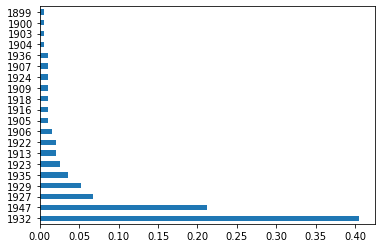

In [48]:
# 6) i
df_time['production_done'].value_counts(normalize=True)[:20].plot(kind='barh')
# Procentvis visualisering af, hvornår SMK's Matisse-værker er dateret

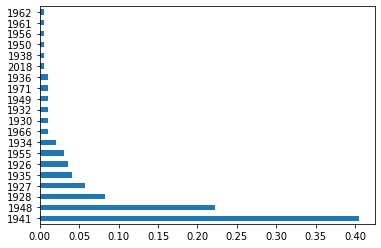

In [49]:
#6) ii
df_time['acquisition_year'].value_counts(normalize=True)[:20].plot(kind='barh')
# procentvis visualisering af, hvornår SMK har anskaffet sig flest Matisse-værker

In [50]:
df_colors = df.filter(['title', 'production_done', 'colors_0', 'colors_1', 'colors_2', 'colors_3', 'colors_4'], axis=1)
# Jeg opretter et nyt dataframe - df_colors, mhp at visualisere statistik over farverne i SMK's Matisse-samling

In [51]:
df_colors

,title,production_done,colors_0,colors_1,colors_2,colors_3,colors_4
id,,,,,,,
1180064772_object,Portræt af Madame Matisse. Den grønne stribe,1905,#863B7A,#F4C6A3,#555555,#9B9B9B,#037676
1180076925_object,Selvportræt,1906,#D2D2D2,#555555,#9B9B9B,#5A5A5A,#9B9B9B
1180078562_object,Guldfiskene,1912,#555555,#555555,#000000,#9B9B9B,#5A5A5A
1180044362_object,Le Luxe II,1908,#9B9B9B,#5A5A5A,#5A5A5A,#9B9B9B,#555555
1180048692_object,Lyserøde løg,1907,#F4C6A3,#5A5A5A,#9B9B9B,#9B9B9B,#000000
...,...,...,...,...,...,...,...
1180077736_object,Svane med udbredte vinger og krum hals. F.o. r...,1932,#FFFFFF,#FFFFFF,#FFFFFF,#D2D2D2,#D2D2D2
1180078107_object,"Faun og nøgen kvindefigur, liggende. F.n. rids...",1932,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#D2D2D2
1180082384_object,To nøgne kvindefigurer og en faun. F.n. rids a...,1932,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#D2D2D2


In [52]:
# ... og sorterer det efter årstallet 'production_done'
df_sort_color = df_colors.sort_values(by=['production_done'])

In [53]:
df_colorz = df_sort_color.filter(['colors_0', 'colors_1', 'colors_2', 'colors_3', 'colors_4'], axis=1)
# For nemmere at kunne lave en optælling af unikke værdier på tværs af farvekolonnerne, laver jeg et nyt dataframe, df_colors


In [54]:
df_colorz.head()

,colors_0,colors_1,colors_2,colors_3,colors_4
id,,,,,
1180053547_object,#5A5A5A,#555555,#000000,#9B9B9B,#9B9B9B
1180046872_object,#5A5A5A,#9B9B9B,#F4C6A3,#555555,#9B9B9B
1180032028_object,#555555,#5A5A5A,#863B7A,#5A5A5A,#9B9B9B
1180050162_object,#D2D2D2,#D2D2D2,#FFFFFF,#F4C6A3,#9B9B9B
1180061297_object,#5A5A5A,#9B9B9B,#9B9B9B,#D2D2D2,#000000


In [55]:
df_sort_color['num_uniq'] = [len(set(v[pd.notna(v)].tolist())) for v in df_sort_color.values]
# Her flytter jeg en optælling af unikke værdier fra 'df_colorz' tilbage i mit df_sort_color som en ekstra kolonne

In [56]:
df_sort_color = df_sort_color.dropna()
# og fjerner null-værdier

In [57]:
df_sort_color
# Og resultatet er, at 'df_sort_color' nu rangerer Matisses værker efter årstal, og hver kolonne markerer sit antal unnikke farver

,title,production_done,colors_0,colors_1,colors_2,colors_3,colors_4,num_uniq
id,,,,,,,,
1180053547_object,Solsikker i en vase,1898,#5A5A5A,#555555,#000000,#9B9B9B,#9B9B9B,6
1180046872_object,Gade i Arcueil,1899,#5A5A5A,#9B9B9B,#F4C6A3,#555555,#9B9B9B,6
1180032028_object,Stående mandlig model,1900,#555555,#5A5A5A,#863B7A,#5A5A5A,#9B9B9B,6
1180050162_object,La premiere pose,1903,#D2D2D2,#D2D2D2,#FFFFFF,#F4C6A3,#9B9B9B,6
1180061297_object,"Place des Lices, Saint-Tropez",1904,#5A5A5A,#9B9B9B,#9B9B9B,#D2D2D2,#000000,6
...,...,...,...,...,...,...,...,...
1180032002_object,"Notre Dame, Paris",1937,#FFFFFF,#FFFFFF,#FFFFFF,#D2D2D2,#D2D2D2,4
1180007843_object,"Kvinde i halvfigur, med hænderne løftet til håret",1938,#555555,#FFFFFF,#555555,#5A5A5A,#9B9B9B,6
1180071969_object,"Siddende kvindelig model, vendt mod højre",1940,#D2D2D2,#D2D2D2,#D2D2D2,#D2D2D2,#D2D2D2,3


In [58]:
import altair as alt
alt.renderers.enable('notebook')
#Jeg importerer altar

alt.renderers.set_embed_options(theme='dark')
#... og sætter standard-temaet til 'dark'

RendererRegistry.enable('notebook')

In [59]:
source = pd.DataFrame(df_sort_color)

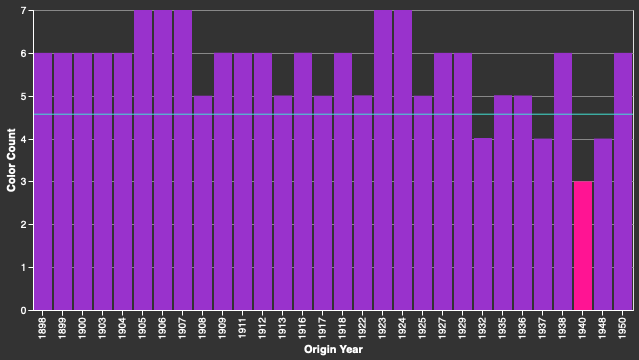

In [60]:
# 6)iii
bar = alt.Chart(source).mark_bar().encode(
    x= 'production_done:O',
    y= 'num_uniq:Q',
    color = alt.condition(
        alt.datum.production_done == 1940, 
        alt.value('deeppink'),
        alt.value('darkorchid')
    )
# Jeg laver lidt styling med farverne, og markerer det år, hvor Matisse har færrest farver i de af hans værker SMK er i besiddelse af
      
)

mean = alt.Chart(source).mark_rule(color='turquoise').encode(
    y = 'mean(num_uniq):Q'
)

bar.encoding.x.title = "Origin Year"
bar.encoding.y.title = "Color Count"


(bar + mean)

Ovenstående søjlediagram viser således antallet af farver i SMK's Matisse-værker. Gennemsnittet er markeret med den mørkeblå linje, og jeg har markeret det år Matisse (blandt sine SMK-udstillede værker) har været mest farveløs (1940) med pink.